<a href="https://colab.research.google.com/github/hitanshu5/Image-Processing-and-Computer-Vision/blob/main/IPCVEXP2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2 as cv
import matplotlib.pyplot as plt
import random
import tensorflow as tf
import numpy as np

In [ ]:
from tensorflow.keras.datasets import fashion_mnist

In [ ]:
(train_images, train_labels), (test_images, test_labels)=tf.keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


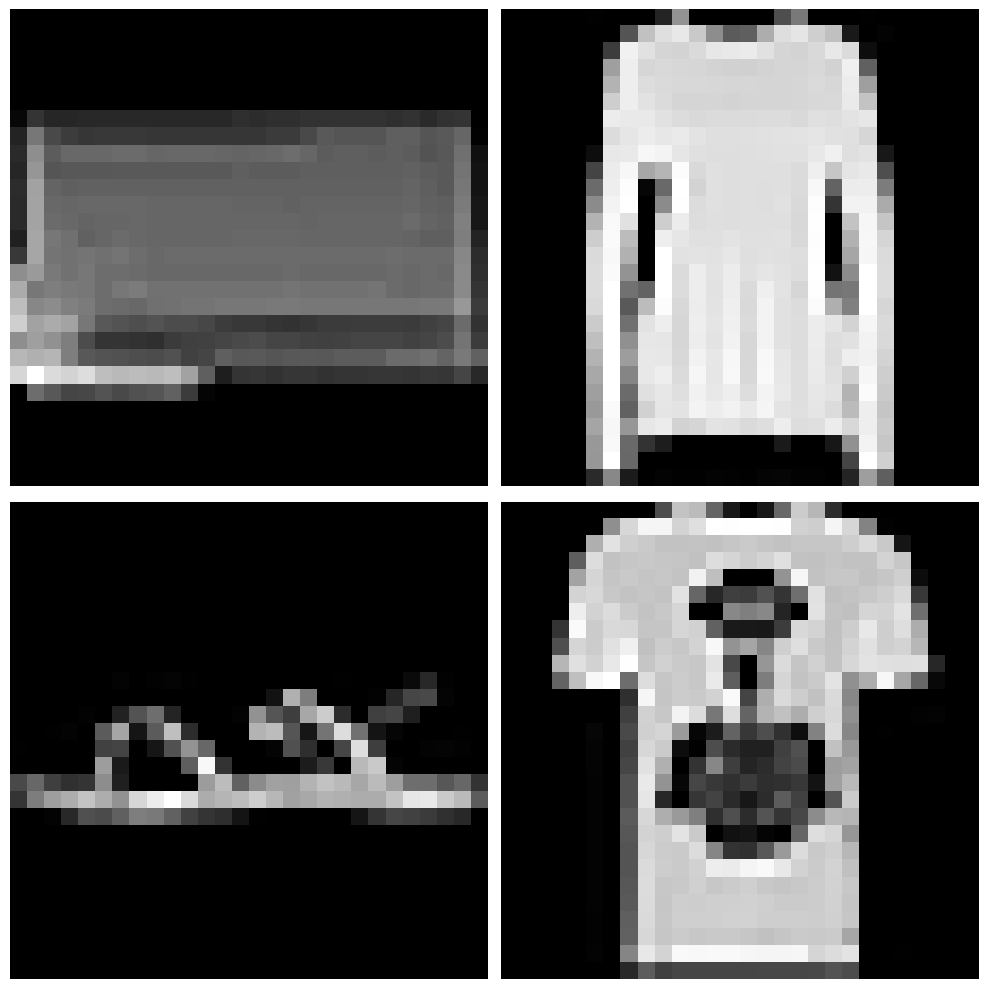

In [ ]:
import random
import matplotlib.pyplot as plt
train_images = train_images.reshape((60000, 28, 28, 1))
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes = axes.flatten()

for ax in axes:
    random_index = random.randint(0, len(train_images) - 1)
    ax.imshow(train_images[random_index].reshape(28, 28), cmap='gray')
    ax.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
def neg(image):

    negative = []
    for i in range(len(image)):
        temp = []
        for j in range(len(image[i])):
            s = 256-1-image[i][j]
            temp.append(s)
        negative.append(temp)
    return np.array(negative)

In [ ]:
def display(o,t,title1,title2):
  plt.figure(figsize=(15,5))
  plt.subplot(1,2,1)
  plt.title(title1)
  plt.imshow(o,cmap='gray')
  plt.axis('off')
  plt.subplot(1,2,2)
  plt.title(title2)
  plt.imshow(t,cmap='gray')
  plt.axis('off')
  plt.show()

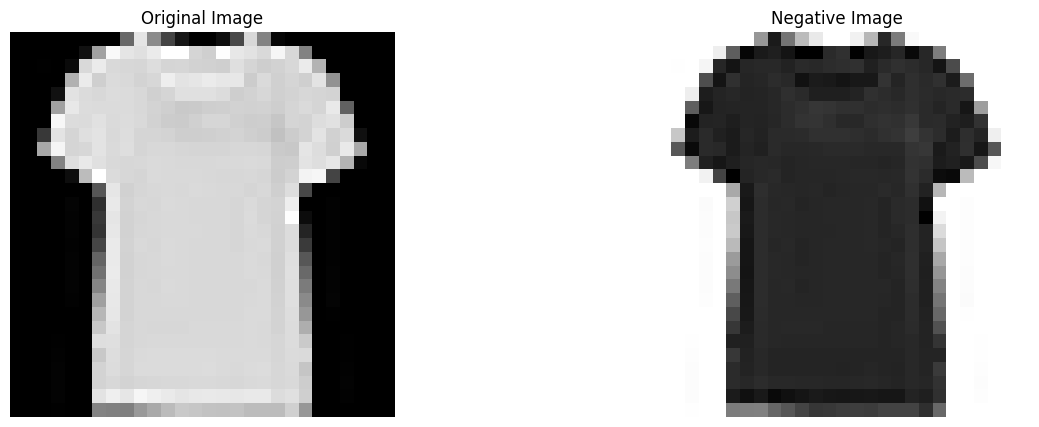

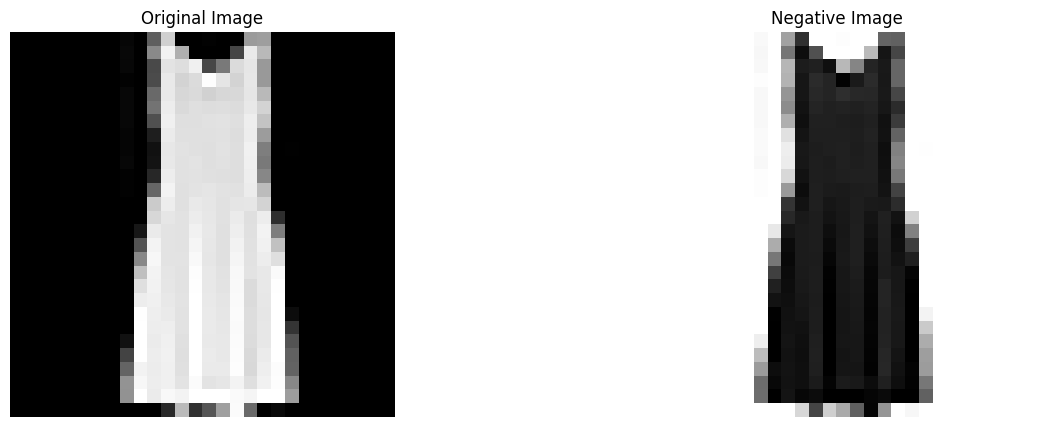

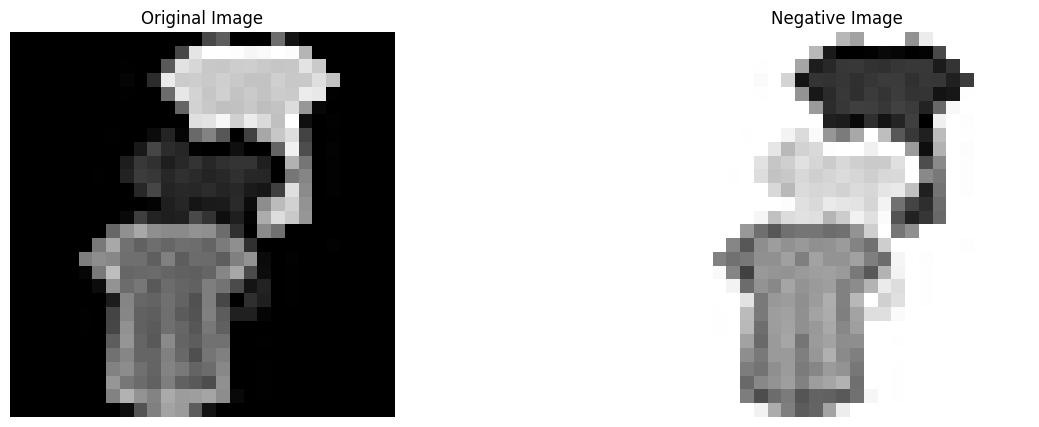

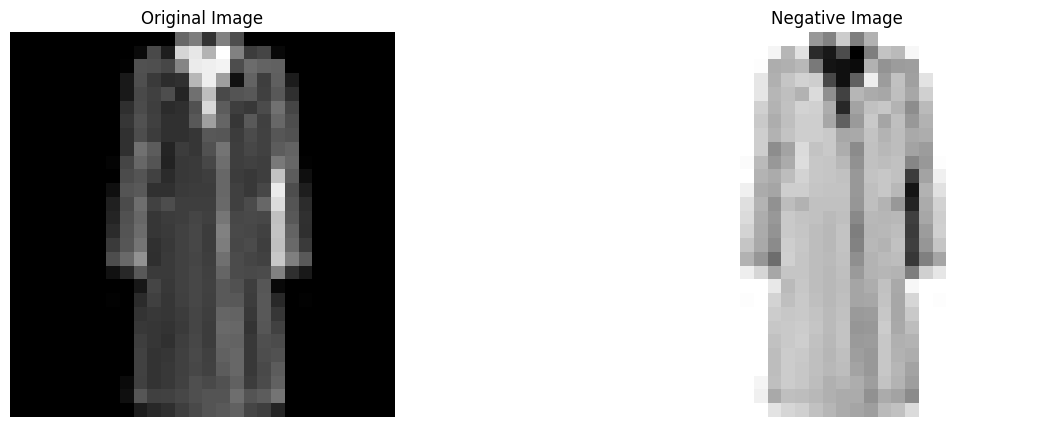

In [ ]:
for i in range(4):
    random_index = random.randint(0, len(train_images) - 1)
    img = train_images[random_index]
    img_negative = neg(img)
    display(img, img_negative, 'Original Image', 'Negative Image')

In [ ]:
def image_thresholding(image,threshold):
  new_image = image.copy()
  for i in range(image.shape[0]):
    for j in range(image.shape[1]):
      if image[i][j] >= threshold:
        new_image[i][j] = 255
      else:
         new_image[i][j] = 0
  return new_image

FOR THRESHOLD VALUE: 127


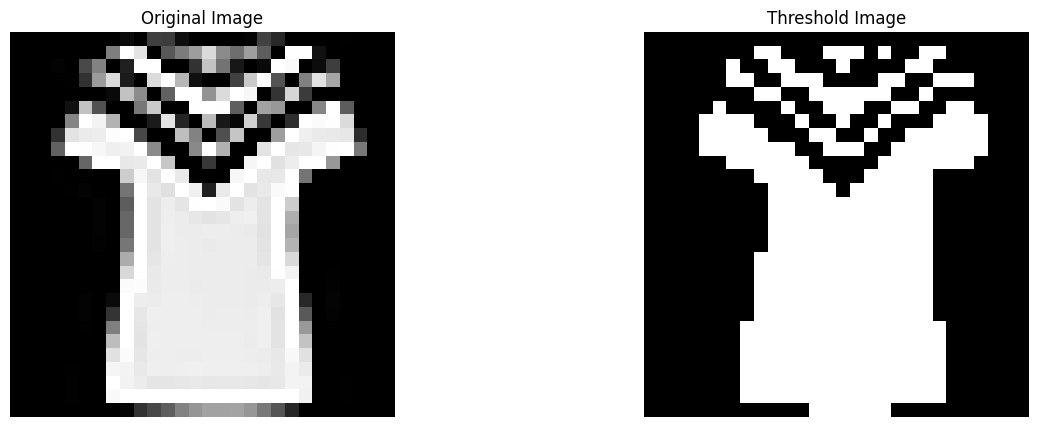

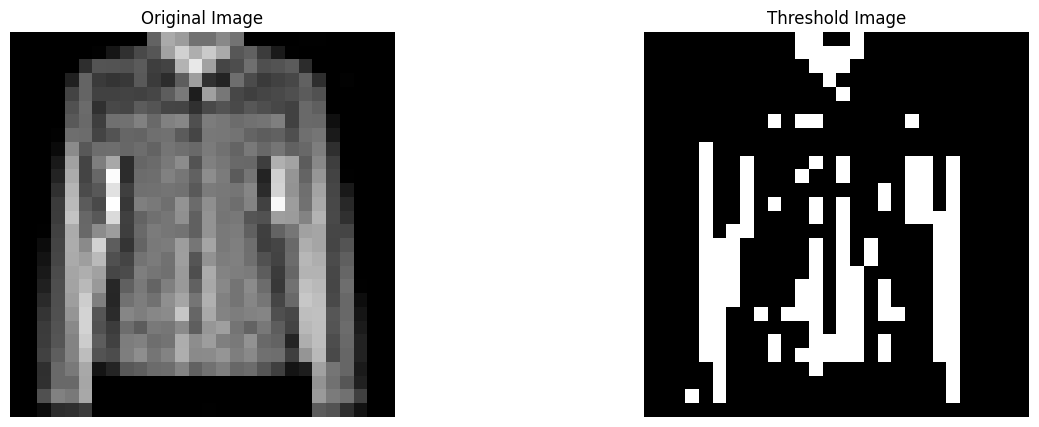

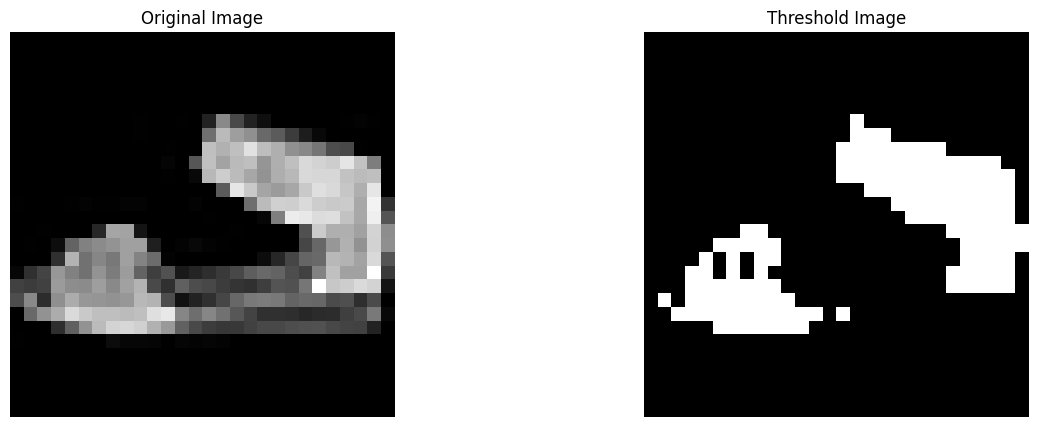

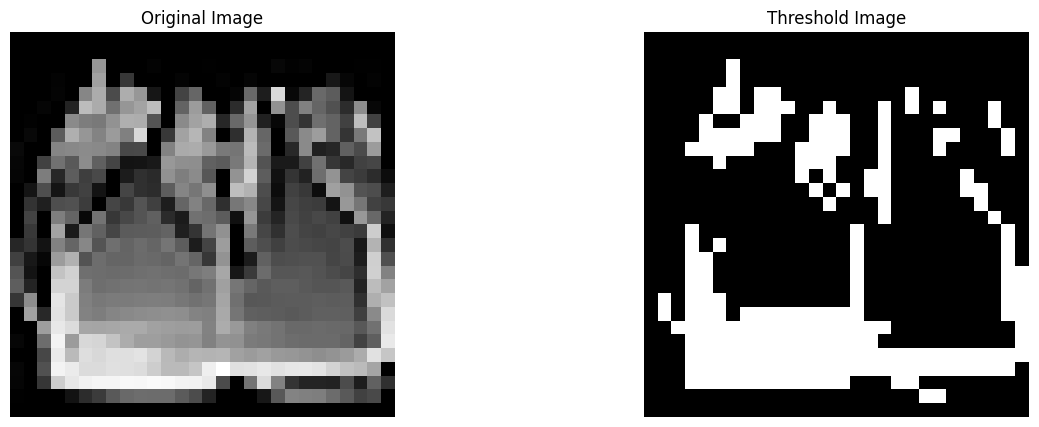

FOR THRESHOLD VALUE: 35


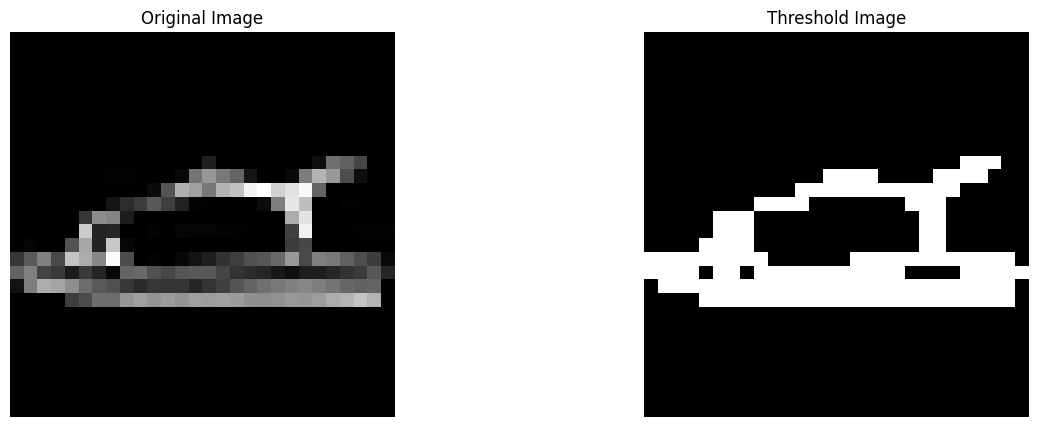

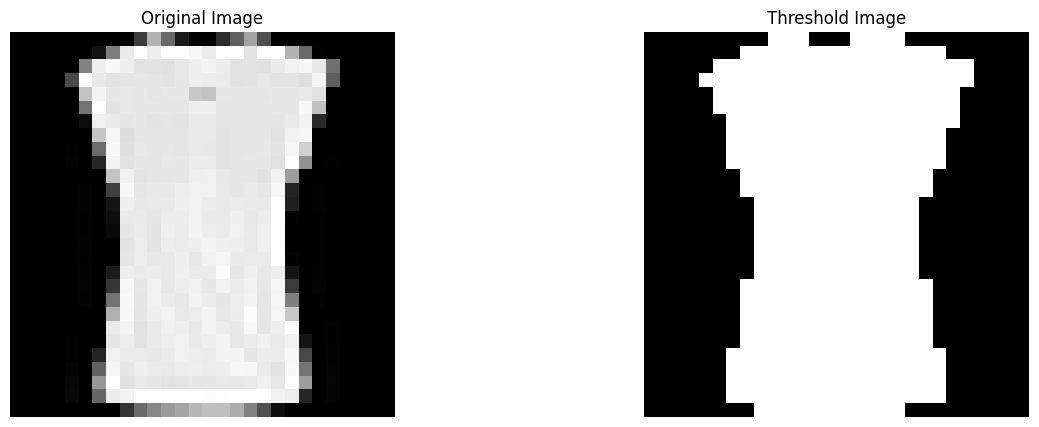

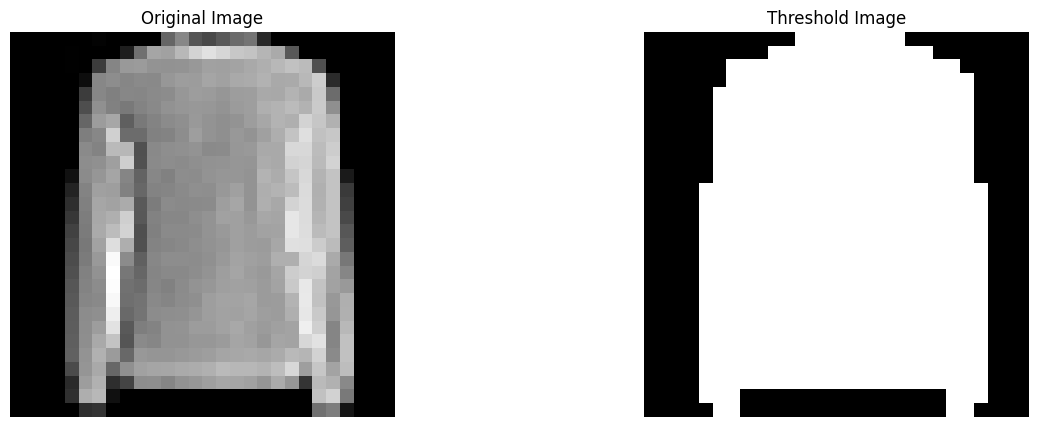

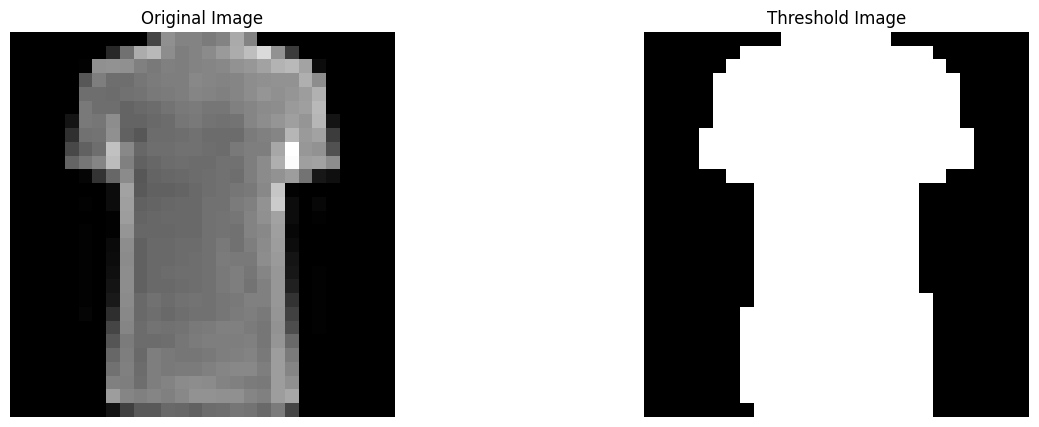

FOR THRESHOLD VALUE: 79


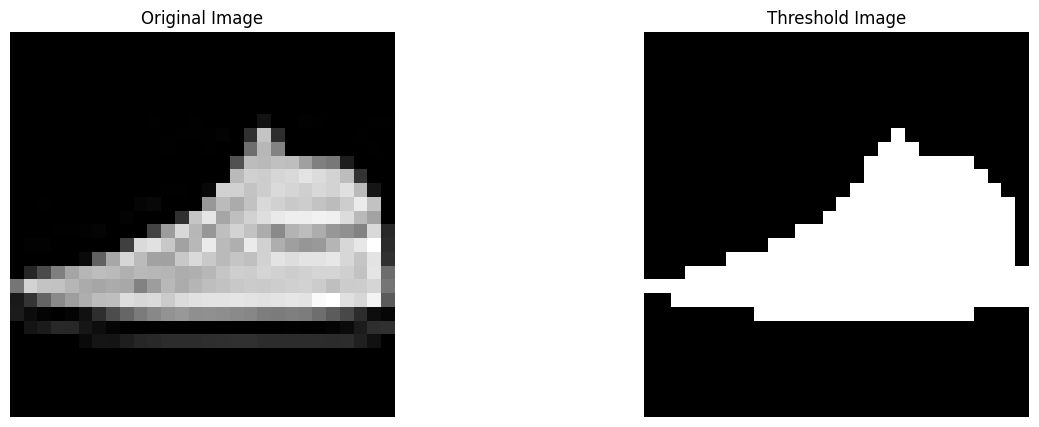

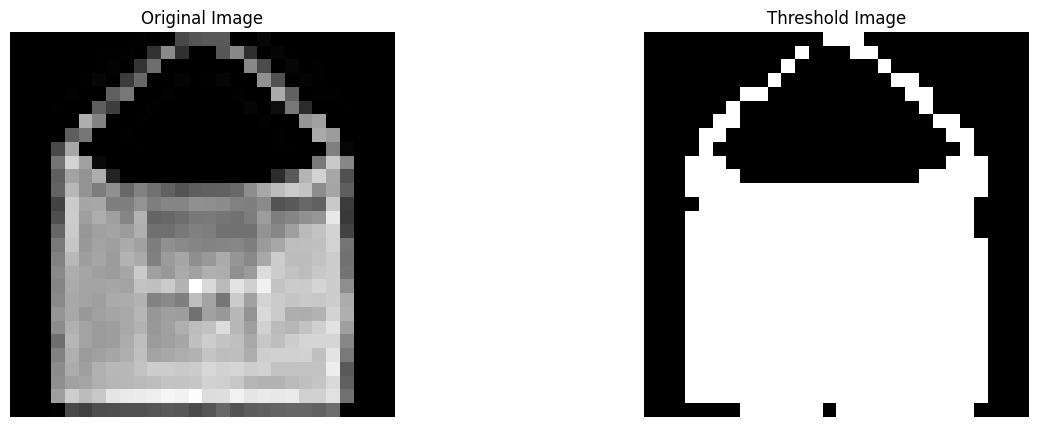

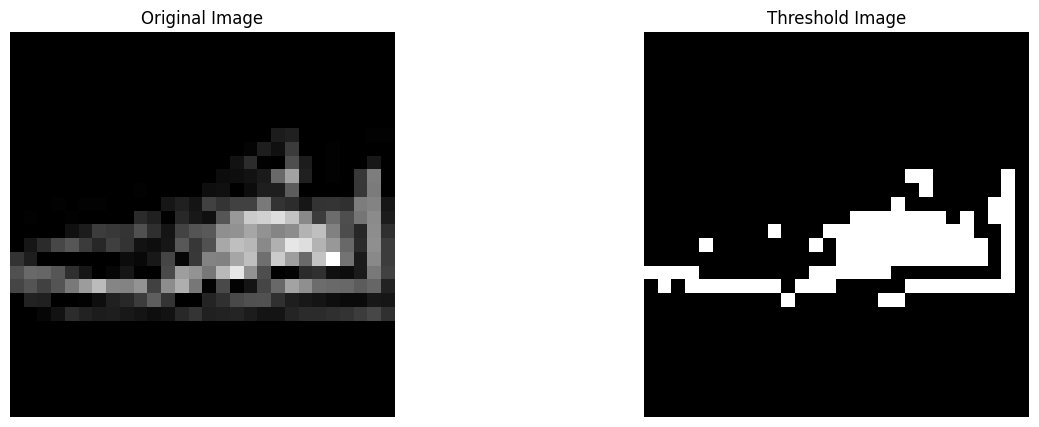

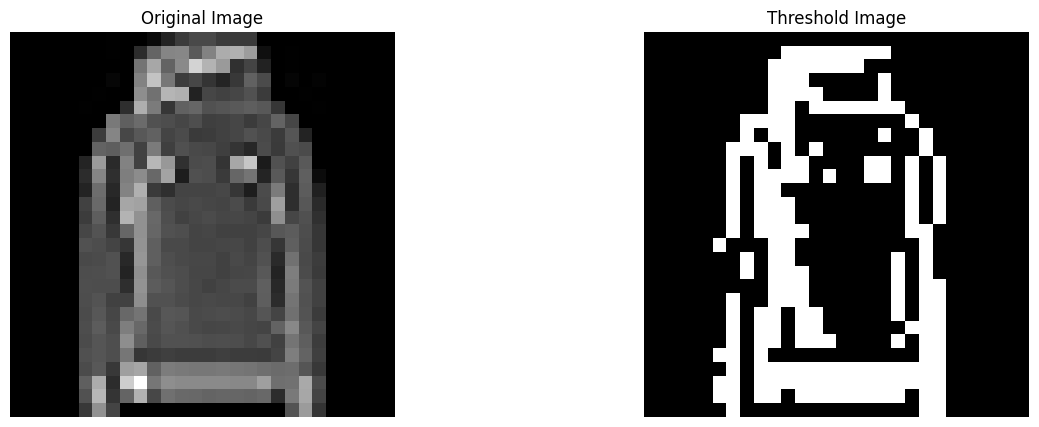

FOR THRESHOLD VALUE: 135


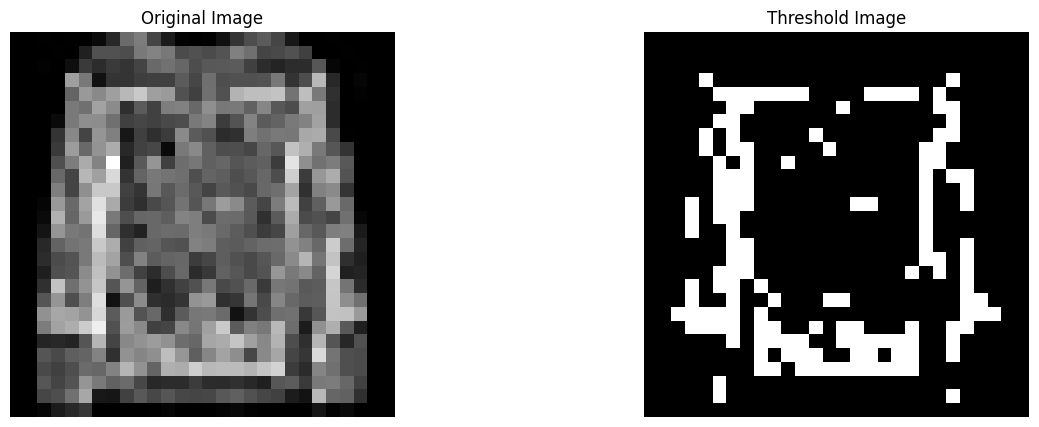

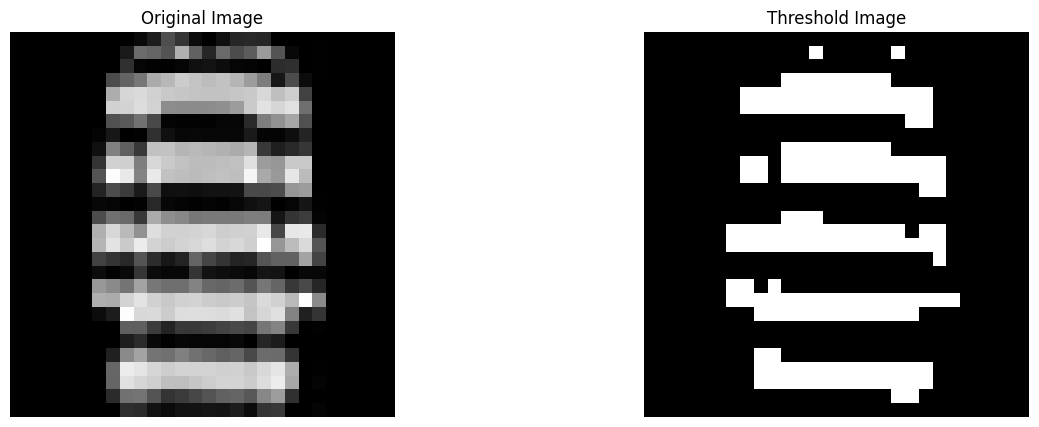

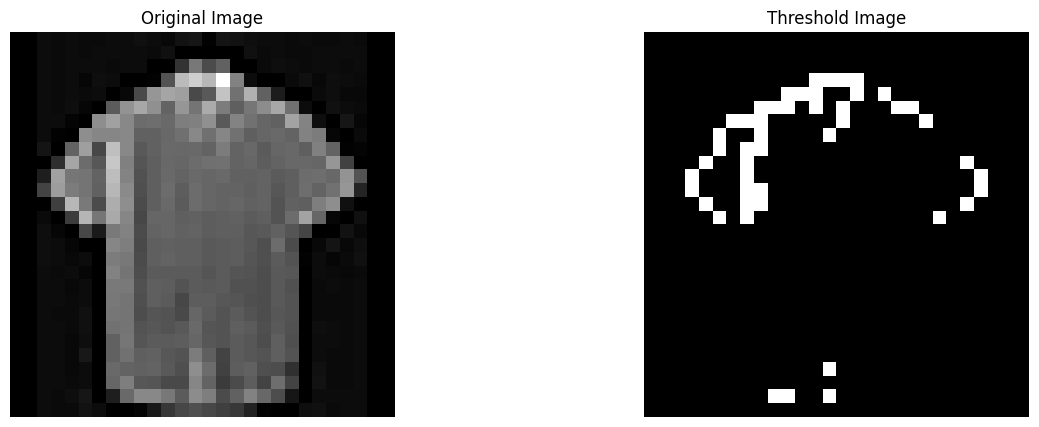

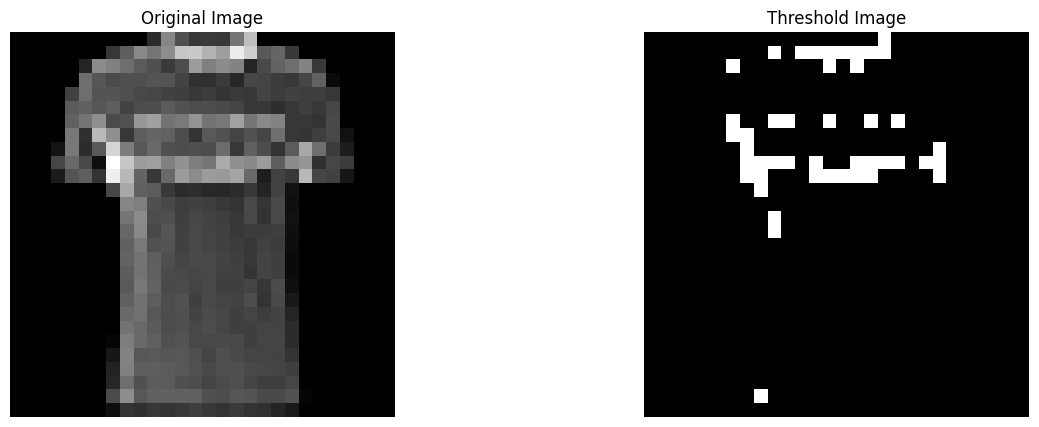

In [ ]:
threshold = [127,35,79,135]
for i in range(4):
  print(f"FOR THRESHOLD VALUE: {threshold[i]}")
  for j in range(len(threshold)):
    random_index = random.randint(0, len(train_images) - 1)
    img = train_images[random_index]
    img_threshold = image_thresholding(img,threshold[i])
    display(img, img_threshold, 'Original Image', 'Threshold Image')

In [ ]:
def grey_level_slicing_without_background(image,a,b):
  gls_without_bg = []
  for i in range(len(image)):
    temp = []
    for j in range(len(image)):
      if(image[i][j]>=a and image[i][j]<=b):
        s = 255
      else:
        s = 0
      temp.append(s)
    gls_without_bg.append(temp)
  return np.array(gls_without_bg)

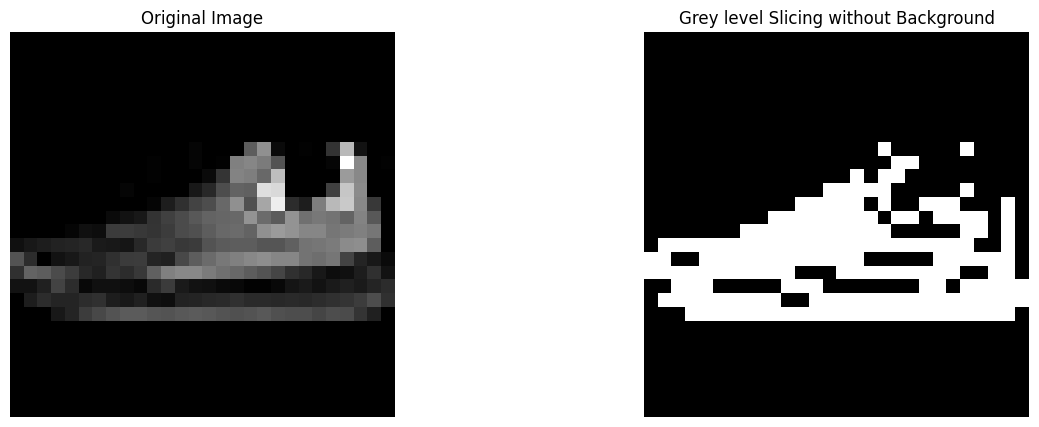

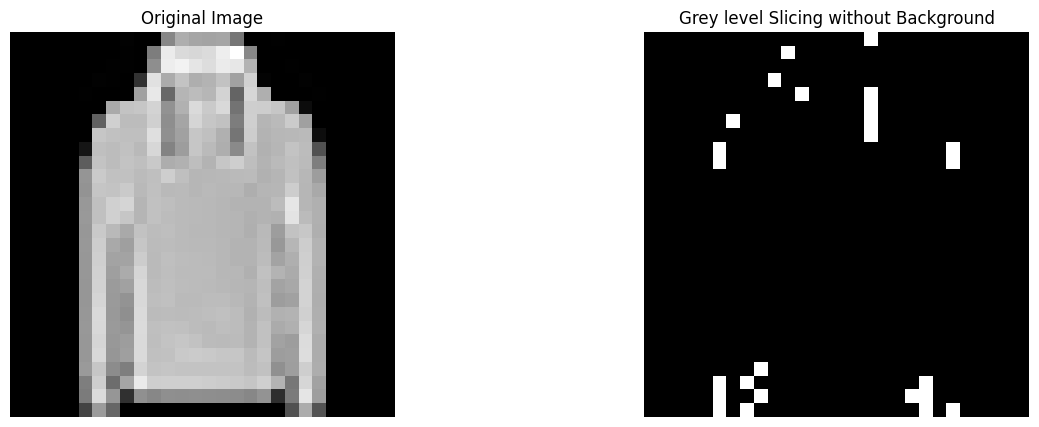

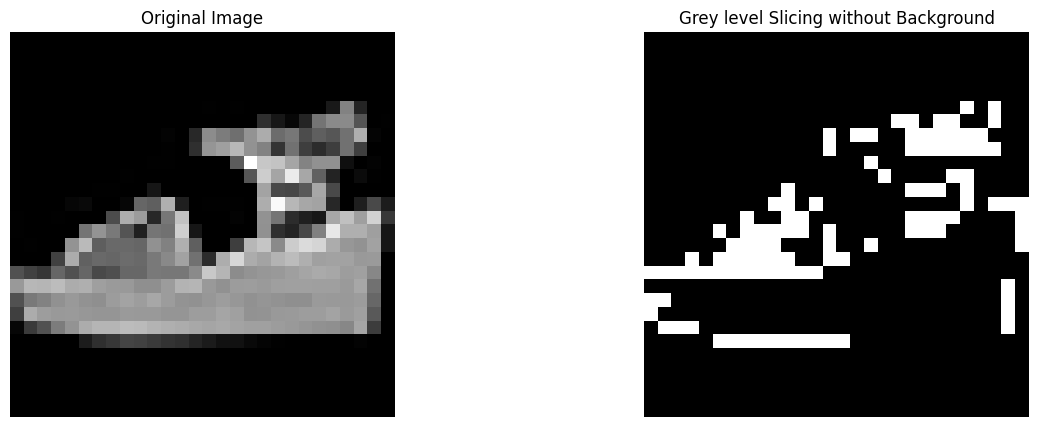

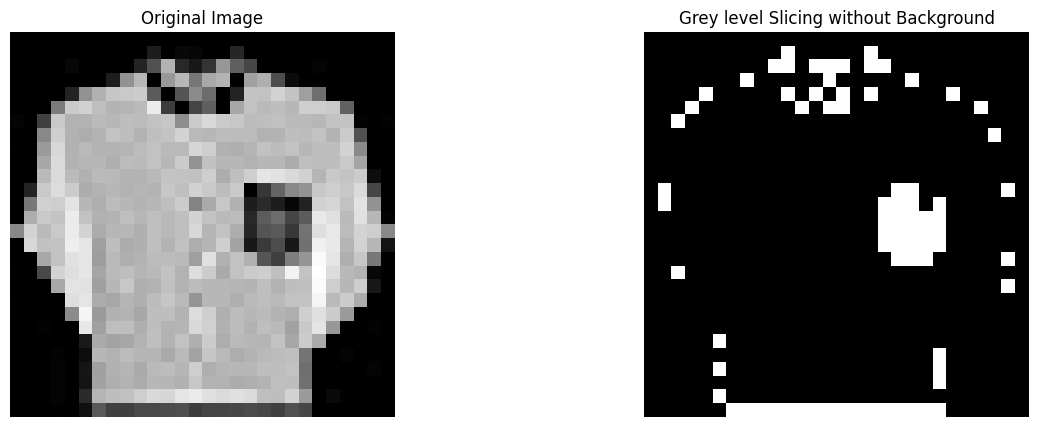

In [ ]:
for i in range(4):
    random_index = random.randint(0, len(train_images) - 1)
    img = train_images[random_index]
    img_gls_without_bg = grey_level_slicing_without_background(img,20,127)
    display(img, img_gls_without_bg, 'Original Image', 'Grey level Slicing without Background')

In [ ]:
def grey_level_slicing_with_background(image,a,b):
  gls_without_bg = []
  for i in range(len(image)):
    temp = []
    for j in range(len(image)):
      if(image[i][j]>=a and image[i][j]<=b):
        s = image[i][j]
      else:
        s = 0
      temp.append(s)
    gls_without_bg.append(temp)
  return np.array(gls_without_bg)

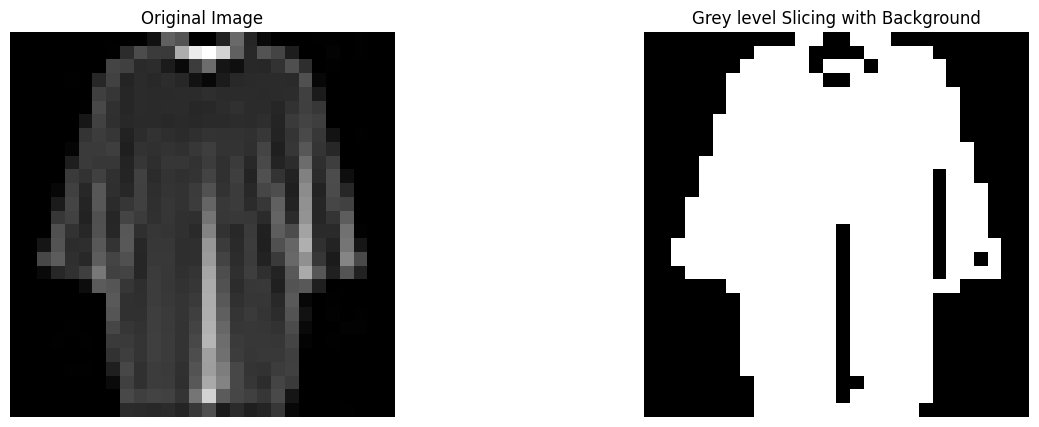

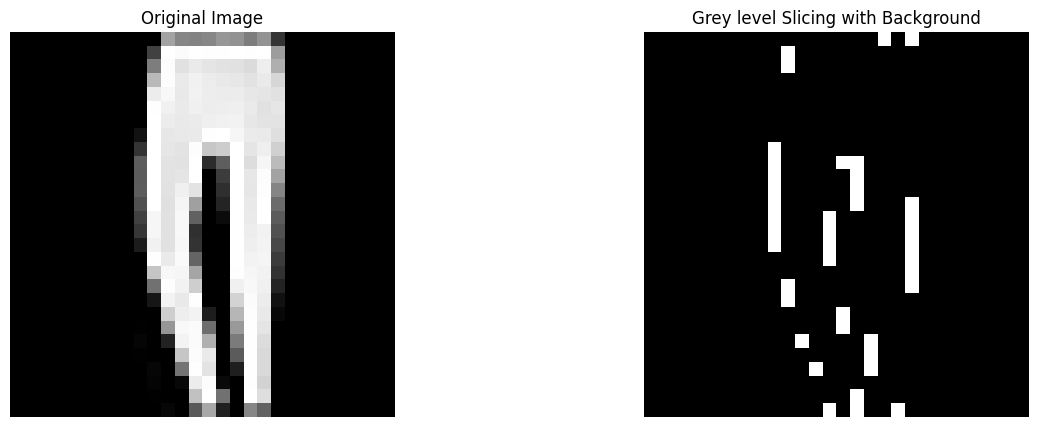

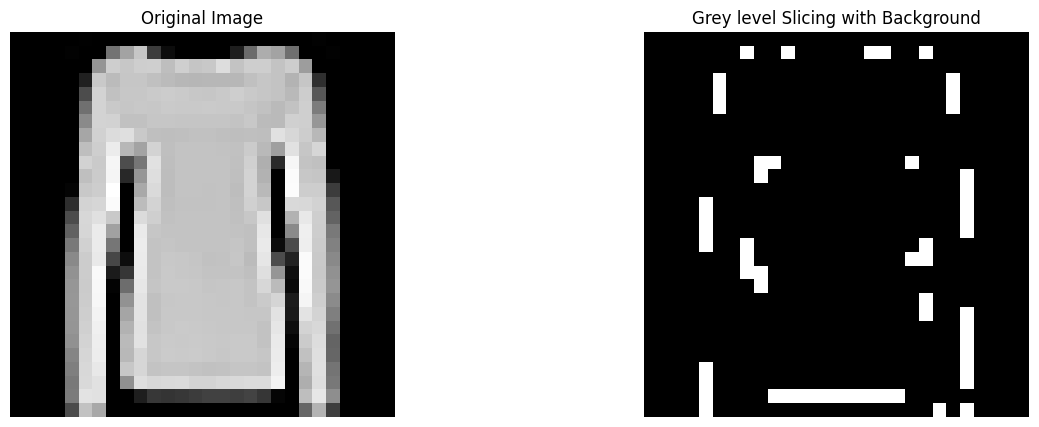

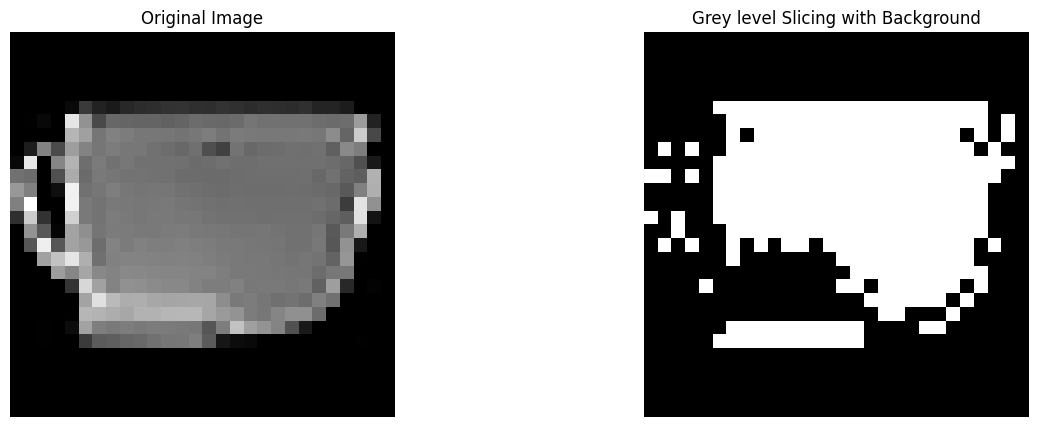

In [ ]:
for i in range(4):
    random_index = random.randint(0, len(train_images) - 1)
    img = train_images[random_index]
    img_gls_with_bg = grey_level_slicing_without_background(img,20,127)
    display(img, img_gls_with_bg, 'Original Image', 'Grey level Slicing with Background')

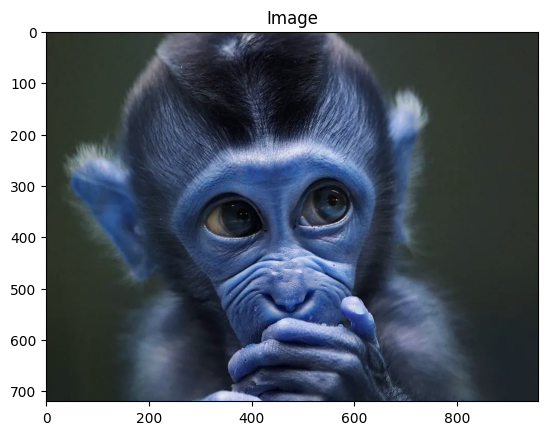

In [ ]:
image = cv.imread("/content/960x0.webp")
plt.imshow(image)
plt.title("Image")
plt.show()

In [ ]:
gray_scale_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

Text(0.5, 1.0, 'Grey Scale')

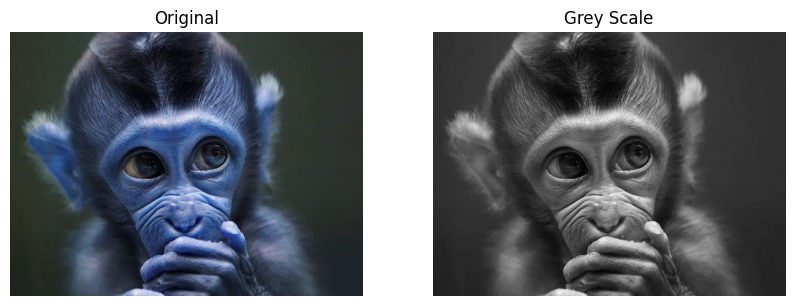

In [ ]:
fig=plt.figure(figsize=(10,7))
fig.add_subplot(1,2,1)
plt.imshow(image)
plt.axis('off')
plt.title("Original")
fig.add_subplot(1,2,2)
plt.imshow(gray_scale_image,cmap="gray")
plt.axis('off')
plt.title("Grey Scale")

In [ ]:
negative_image = neg(gray_scale_image)

Text(0.5, 1.0, 'Negative Image')

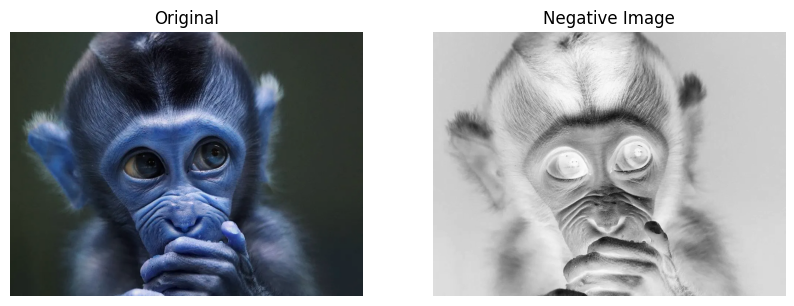

In [ ]:
fig=plt.figure(figsize=(10,7))
fig.add_subplot(1,2,1)
plt.imshow(image)
plt.axis('off')
plt.title("Original")
fig.add_subplot(1,2,2)
plt.imshow(negative_image,cmap="gray")
plt.axis('off')
plt.title("Negative Image")

In [ ]:
threshold_image = image_thresholding(gray_scale_image,127)

Text(0.5, 1.0, 'Threshold Image')

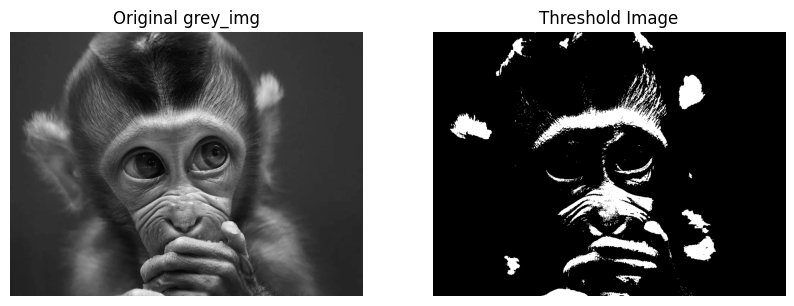

In [ ]:
fig=plt.figure(figsize=(10,7))
fig.add_subplot(1,2,1)
plt.imshow(gray_scale_image,cmap="gray")
plt.axis('off')
plt.title("Original grey_img")
fig.add_subplot(1,2,2)
plt.imshow(threshold_image,cmap="gray")
plt.axis('off')
plt.title("Threshold Image")

In [ ]:
gls_without_bg_image = grey_level_slicing_without_background(gray_scale_image,27,120)

Text(0.5, 1.0, 'Gray Level Slicing Without Background Image')

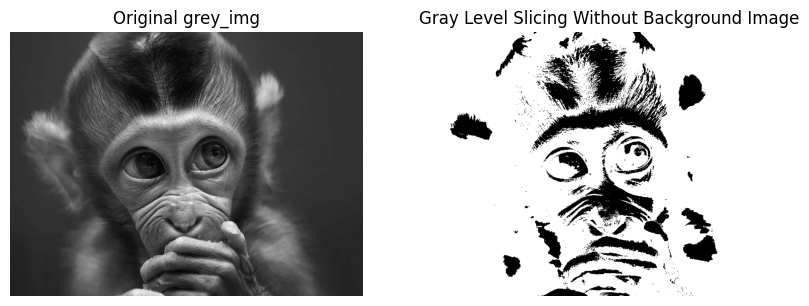

In [ ]:
fig=plt.figure(figsize=(10,7))
fig.add_subplot(1,2,1)
plt.imshow(gray_scale_image,cmap="gray")
plt.axis('off')
plt.title("Original grey_img")
fig.add_subplot(1,2,2)
plt.imshow(gls_without_bg_image,cmap="gray")
plt.axis('off')
plt.title("Gray Level Slicing Without Background Image")

In [ ]:
gls_with_bg_image = grey_level_slicing_with_background(gray_scale_image,27,127)

Text(0.5, 1.0, 'Gray Level Slicing With Background Image')

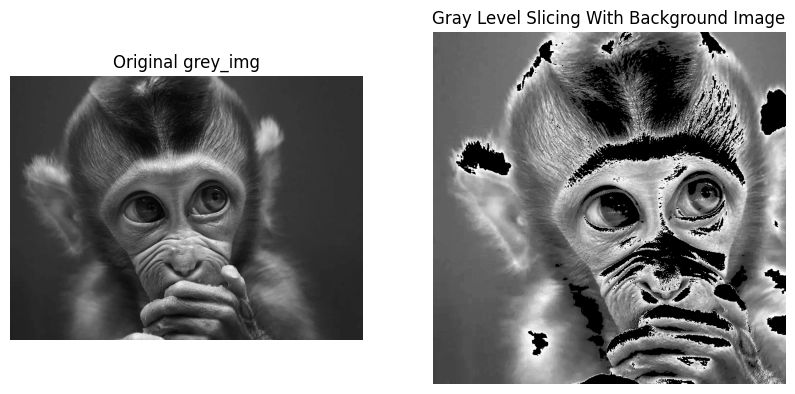

In [ ]:
fig=plt.figure(figsize=(10,7))
fig.add_subplot(1,2,1)
plt.imshow(gray_scale_image,cmap="gray")
plt.axis('off')
plt.title("Original grey_img")
fig.add_subplot(1,2,2)
plt.imshow(gls_with_bg_image,cmap="gray")
plt.axis('off')
plt.title("Gray Level Slicing With Background Image")